# Resposta Em Frequência


## Resposta à uma Excitação  Senoidal


A reposta de um sistema $S$ à uma exponencial de duração infinita com frequência complexa $s$, $e^{st}$, é obtida através da integral de convolução

$$y(t)=e^{st}*h(t)=\int_{-\infty}^{\infty} e^{s\tau}h(t-\tau)\,d\tau=\int_{-\infty}^{\infty}h(\tau)e^{s(t-\tau)}\,d\tau=e^{st}\int_{-\infty}^{\infty}h(\tau)e^{-s\tau}\,d\tau=e^{st}H(s)$$

onde $h(t)$ é a resposta ao impulso. 

Podemos escrever simplesmente que

$$e^{st}\Rightarrow S\Rightarrow H(s)e^{st}$$

Agora, fazendo $s=j\omega$, teremos $H(s)=H(j\omega)$, e portanto

$$e^{j\omega t}\Rightarrow S\Rightarrow H(j\omega)e^{j\omega t}$$

onde $e^{j\omega t}=\cos{\omega t}+j\sin{\omega t}$. Por isso, tomando apenas a parte real,

$$\Re (e^{j\omega t})=\cos(\omega t) \Rightarrow S\Rightarrow \Re (H(j\omega)e^{j\omega t})$$

$H(j\omega )=\big|H(j\omega )\big|e^{j\angle H(j\omega)}$. Substituindo na expressão acima, temos

$$\Re (e^{j\omega t})=\cos(\omega t) \Rightarrow S\Rightarrow \big|H(j\omega )\big|\Re(e^{j(\omega t+\angle H(j\omega))})=\big|H(j\omega )\big|\cos(\omega t+\angle H(j\omega))$$

onde $\big|H(j\omega)\big|$  é o ganho de amplitude, $\angle H(j\omega)$ é a resposta de fase e $H(j\omega)$ é a resposta em frequência do sistema.

**Exemplo** Seja um sistema com função de transferência $H(s)=\frac{s+0.1}{s+5}$, e uma entrada $x(t)=\cos(\omega t)$. 

In [1]:
from lcapy import *
H=transfer((s+0.1)/(s+5))
H

s + 1/10  
────────⋅1
 s + 5    

In [2]:
Hr=H(jomega).val
Hr

ⅉ⋅ω + 0.1
─────────
ⅉ⋅ω + 5.0

In [3]:
Num=abs(Hr.numerator).val
Den=abs(Hr.denominator).val
Hm=Num/Den
Hm

          -0.5              
⎛ 2      ⎞               0.5
⎜ω       ⎟     ⎛ 2    1 ⎞   
⎜── + 1.0⎟    ⋅⎜ω  + ───⎟   
⎝25      ⎠     ⎝     100⎠   
────────────────────────────
             5              

In [4]:
Hf=Hr.phase_degrees.val
Hf

                     ⎛    49.0⋅ω   ⎞
57.2957795130823⋅atan⎜─────────────⎟
                     ⎜      2      ⎟
                     ⎝10.0⋅ω  + 5.0⎠

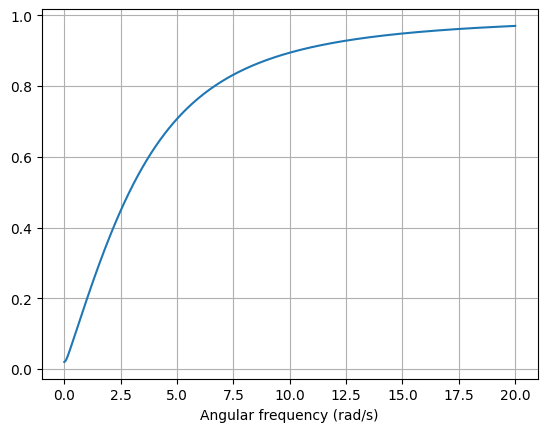

In [5]:
Hm.plot((0,20));

In [6]:
Hm(2).val

0.371854624912701

In [7]:
Hm(10).val

0.894471911241488

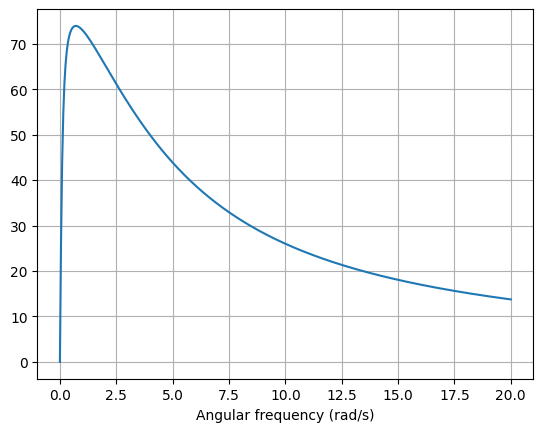

In [8]:
Hf.plot((0,20));

In [9]:
Hf(2).val

65.3361852875364

In [10]:
Hf(10).val

25.9921124793945

**Exemplo** O atrasador ideal

Um atrasador ideal de $T$ segundos é um sistema tal que $y(t)=x(t-T)$. Segundo a propriedade do deslocamento no tempo, $Y(s)=e^{-sT}X(s)$.  Portanto, a função de transferência do atrasador ideal de $T$ segundos é $H(s)=e^{-sT}$.

In [11]:
T=symbol('T')
H=transfer(exp(-s*T))
Hr=H(jomega)
Hr

 -ⅉ⋅T⋅ω
ℯ      

In [12]:
Hm=abs(Hr)
Hm

1

In [13]:
Hf=Hr.angle
Hf

atan2(-sin(T⋅ω), cos(T⋅ω))

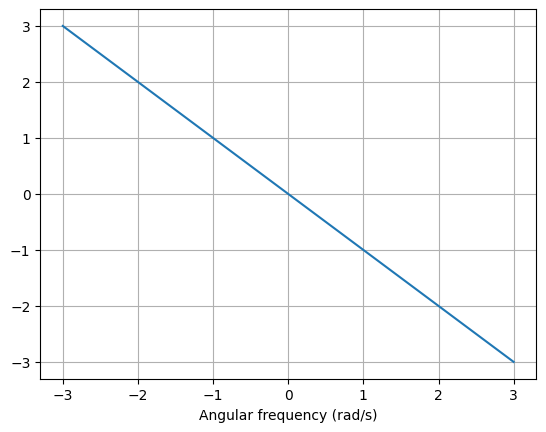

In [14]:
Hf.subs('T',1).plot((-3,3));

O deslocamento de fase aumenta linearmente com a frequência, com inclinação $-T$. No atrasador ideal, a saída deve ser uma cópia do sinal de entrada com atraso definido por $t-T$. Portanto, o módulo da resposta em frequência é unitária independentemente da frequência, e o deslocamento de fase cai linearmente em função da frequência. Um filtro com esta característica (as diferentes frequências do sinal de entrada são atrasadas de maneira uniforme) é denominado de **filtro de fase linear**.

**Exemplo** O diferenciador ideal

Um diferenciador ideal é um sistema tal que $y(t)=\frac{dx(t)}{dt}$. Segundo a propriedade da derivada temporal, $Y(s)=sX(s)$, e a função de transferência é $H(s)=s$.

In [15]:
H=transfer(s)
Hr=H(jomega)
Hr

ⅉ⋅ω

In [16]:
Hm=abs(Hr)
Hm

│ω│

In [17]:
Hf=Hr.phase
Hf(6)

π
─
2

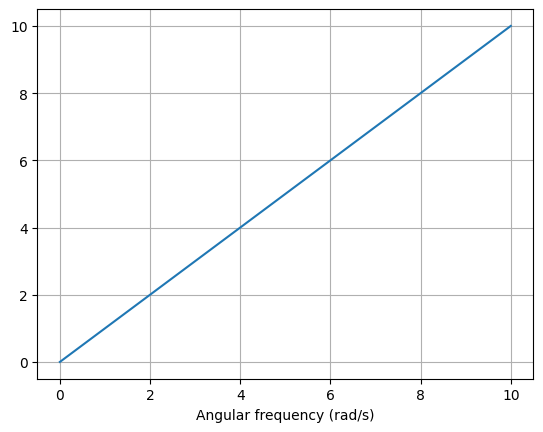

In [18]:
Hm.plot((0,10));

Em um diferenciador ideal a resposta de fase é contante ($\frac{\pi}{2}$) para todas as frequências. Por outro lado, o ganho cresce linearmente com a frequência, fazendo com que componentes de alta frequência sejam ampliadas. Este fato é  importante porque todo sinal real é contaminado com ruído de alta frequência, e portanto o diferenciador ideal pode amplificar exageradamente o ruído em relação ao conteúdo original do sinal de entrada. 

**Exemplo** O integrador ideal

Para o integrador ideal, $y(t)=\int_0^t x(\tau)\,d\tau$, e daí, $Y(s)=\frac{X(s)}{s}$. A função de transferência é $H(s)=\frac{1}{s}$.

In [19]:
H=transfer(1/s)
Hr=H(jomega)
Hr

-ⅉ 
───
 ω 

In [20]:
Hm=abs(Hr)
Hm

1
─
ω

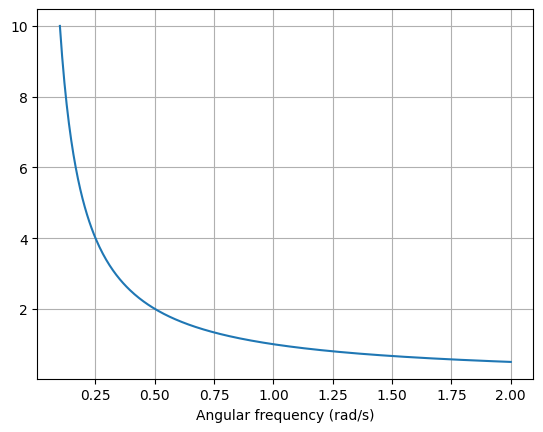

In [21]:
Hm.plot((0.1,2));

In [22]:
Hf=Hr.phase
Hf

-π 
───
 2 

Inversamente ao diferenciador ideal, o integrador ideal atrasa o sinal de entrada com fase constante ($-\frac{\pi}{2}$). Por outro lado o sinal de entrada tem suas componentes de alta frequência atenuadas pelo ganho ($\frac{1}{\omega}$).  Como consequência, ruídos de alta frequência são suprimidos pelo integrador ideal. 

### A Resposta em Frequência Para Uma Entrada Senoidal Causal é a Resposta em Regime Permanente

Seja um sistema com função de transferência $H(s)=\frac{P(s)}{Q(s)}$ e entrada $x(t)=e^{j\omega t}u(t)$. A resposta no domínio de Laplace é

$$Y(s)=\frac{P(s)}{Q(s)}X(s)=\frac{P(s)}{Q(s)}\frac{1}{s-j\omega}$$

Expandindo a resposta acima em frações parciais, teremos algo como

$$Y(s)=\frac{A_1}{s+s_1}+ \frac{A_2}{s+s_2}+ \cdots +\frac{A_N}{s+s_N}+\frac{A_{\omega}}{s-j\omega}$$

Onde ${s_1,s_2...s_N}$ são os polos de $H(s)$, ou as raízes de $Q(s)$. A transformada inversa de cada um dos primeiros $N$ termos é $A_ie^{-s_it}$, e cada um destes termos amortece assintoticamente para zero quando $t\rightarrow \infty$. Portanto, em regime permanente temos

$$Y(s)=\frac{A_{\omega}}{s-j\omega}$$

e finalmente, 

$$A_{\omega}=(s-j\omega)Y(s)=(s-j\omega)H(s)\frac{1}{(s-j\omega)}\bigg|_{s=j\omega}=H(j\omega)\rightarrow Y(s)=\frac{H(j\omega)}{s-j\omega}$$

e

$$y(t\rightarrow \infty)=H(j\omega)e^{j\omega t}u(t)$$